In [402]:
year = 2023
day = 22

In [441]:
from aocd import submit
from aocd.models import Puzzle
from functools import reduce
import numpy as np

puzzle = Puzzle(year=year, day=day)
data = puzzle.input_data
# data = puzzle.examples[0].input_data

data = data.strip()
data = data.split("\n")
# data = []
data = [list(map(int, data.replace("~", ",").split(","))) for data in data]
# y, x, z
blocks = [((d[1], d[0], d[2]), (d[4], d[3], d[5])) for d in data]

data

[[4, 6, 74, 4, 6, 76],
 [0, 3, 277, 0, 4, 277],
 [7, 4, 124, 7, 6, 124],
 [5, 1, 268, 5, 1, 269],
 [6, 8, 273, 6, 8, 274],
 [8, 0, 268, 8, 0, 270],
 [5, 5, 84, 5, 7, 84],
 [1, 9, 196, 3, 9, 196],
 [7, 3, 214, 9, 3, 214],
 [6, 2, 171, 8, 2, 171],
 [6, 4, 122, 7, 4, 122],
 [1, 2, 177, 1, 5, 177],
 [5, 1, 31, 5, 2, 31],
 [1, 3, 196, 1, 6, 196],
 [0, 7, 93, 0, 8, 93],
 [0, 5, 267, 0, 6, 267],
 [7, 2, 256, 9, 2, 256],
 [3, 8, 40, 4, 8, 40],
 [3, 7, 289, 6, 7, 289],
 [7, 5, 269, 7, 7, 269],
 [8, 1, 191, 8, 3, 191],
 [3, 0, 190, 5, 0, 190],
 [4, 8, 278, 6, 8, 278],
 [8, 6, 25, 8, 9, 25],
 [1, 1, 109, 1, 4, 109],
 [4, 6, 270, 4, 7, 270],
 [7, 3, 302, 7, 3, 304],
 [6, 0, 108, 8, 0, 108],
 [8, 1, 87, 8, 1, 88],
 [6, 6, 94, 6, 8, 94],
 [4, 6, 137, 7, 6, 137],
 [3, 4, 20, 3, 7, 20],
 [6, 8, 206, 9, 8, 206],
 [6, 9, 266, 8, 9, 266],
 [3, 0, 9, 3, 1, 9],
 [9, 0, 82, 9, 3, 82],
 [0, 5, 210, 0, 5, 213],
 [5, 5, 303, 7, 5, 303],
 [5, 9, 202, 7, 9, 202],
 [8, 3, 256, 8, 6, 256],
 [4, 1, 273, 4, 4, 273],

In [442]:
grid = np.zeros((11, 11, 400), int)
for start, end in blocks:
    grid[start[0]: end[0] + 1, start[1]: end[1] + 1, start[2]: end[2] + 1] = 1

In [443]:
x = np.zeros(10, int)
x[9:10] = 1
print(x)

[0 0 0 0 0 0 0 0 0 1]


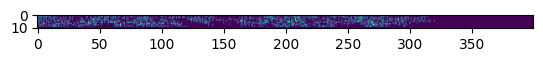

In [444]:
import matplotlib.pyplot as plt

# # sum over y, x-z view
# plt.imshow(np.sum(grid, axis=0))
# sum over x, y-z view
plt.imshow(np.sum(grid, axis=1))

In [445]:
get_dim = lambda block, i: (block[0][i], block[1][i])
shift_down = lambda block: ((block[0][0], block[0][1], block[0][2] - 1), (block[1][0], block[1][1], block[1][2] - 1))
get_bottom_z_slice = lambda block: (
slice(block[0][0], block[1][0] + 1), slice(block[0][1], block[1][1] + 1), block[0][2])
get_block_slice = lambda block: (
slice(block[0][0], block[1][0] + 1), slice(block[0][1], block[1][1] + 1), slice(block[0][2], block[1][2] + 1))


def does_overlap(a, b):
    left = a if a[0] <= b[0] else b
    right = b if a[0] <= b[0] else a
    return left[1] >= right[0]


assert not does_overlap((1, 5), (6, 8))
assert not does_overlap((6, 8), (1, 5))
assert does_overlap((1, 5), (3, 8))
assert does_overlap((3, 8), (1, 5))
assert does_overlap((0, 2), (1, 1))

In [446]:
grid.sum()

3668

In [447]:
moving = True
new_blocks = blocks.copy()
for _ in range(1_000):
    moving = False
    blocks = sorted(new_blocks.copy(), key=lambda loc: loc[0][2])
    new_blocks = []
    for block in blocks:
        block_shifted_down = shift_down(block)
        # check if layer below block is empty
        if grid[*get_bottom_z_slice(block_shifted_down)].sum() == 0 and block[0][2] > 1:
            # print(f"moving {start} {end}")
            grid[*get_block_slice(block)] = 0
            grid[*get_block_slice(block_shifted_down)] = 1
            moving = True
            new_blocks.append(block_shifted_down)
        else:
            new_blocks.append(block)
    if not moving:
        print("done")
        break


done


In [448]:
from collections import defaultdict

supported_by_dict = defaultdict(list)

blocks = sorted(blocks, key=lambda loc: loc[0][2])
for i in range(len(blocks)):
    block = blocks[i]
    if block[0][2] == 1:
        supported_by_dict[i].append(-1)
        continue
    for j in range(i):
        block_below = blocks[j]

        block_x = get_dim(block, 0)
        block_y = get_dim(block, 1)
        block_z = get_dim(block, 2)
        block_below_x = get_dim(block_below, 0)
        block_below_y = get_dim(block_below, 1)
        block_below_z = get_dim(block_below, 2)

        x_y_overlap = does_overlap(block_x, block_below_x) and does_overlap(block_y, block_below_y)

        if x_y_overlap and block_z[0] == block_below_z[1]:
            raise ValueError

        if x_y_overlap and (block_z[0] - 1 == block_below_z[1]):
            supported_by_dict[i].append(j)

supported_by_dict

defaultdict(list,
            {0: [-1],
             1: [-1],
             2: [-1],
             3: [-1],
             4: [-1],
             5: [-1],
             6: [-1],
             7: [-1],
             8: [-1],
             9: [-1],
             10: [-1],
             11: [-1],
             12: [-1],
             13: [-1],
             14: [-1],
             15: [-1],
             16: [-1],
             17: [-1],
             18: [-1],
             19: [-1],
             20: [11],
             21: [2],
             22: [11],
             23: [0],
             24: [12],
             25: [3, 13],
             26: [14],
             27: [11],
             28: [19],
             29: [15],
             30: [1],
             31: [21],
             32: [22],
             33: [22],
             34: [24],
             35: [26],
             36: [25],
             37: [16],
             38: [8],
             39: [31],
             40: [31],
             41: [9, 32],
             42: [35],
 

In [449]:
count = 0
for i in range(len(blocks)):
    if all([(len([s for s in supports if s != i])) for _, supports in supported_by_dict.items()]):
        print(i)
        count += 1

3
4
5
6
7
9
10
13
17
18
20
23
27
28
29
30
32
33
41
49
51
55
56
58
59
62
64
66
70
72
81
82
83
86
91
93
96
102
103
106
107
108
109
110
111
112
118
124
125
127
135
136
138
143
148
149
150
153
158
159
164
167
173
174
185
186
187
191
197
203
204
211
213
214
217
220
222
223
224
232
235
236
239
244
246
248
252
253
257
259
262
264
272
285
286
288
289
293
296
301
303
310
311
313
317
318
320
321
323
327
335
337
345
347
348
355
356
363
370
371
372
373
374
376
379
383
385
386
391
397
398
400
401
404
405
408
409
410
412
416
422
426
428
430
440
443
446
447
449
454
461
464
466
473
475
476
477
478
482
485
487
489
490
493
495
497
500
503
504
510
515
516
518
523
526
527
532
533
534
542
545
547
557
561
562
564
565
568
569
573
581
582
584
590
593
594
597
600
607
610
613
615
617
618
624
629
630
635
636
639
641
642
645
647
653
654
665
669
671
681
682
686
687
689
695
699
700
703
704
708
709
710
711
714
725
727
730
732
734
737
739
744
749
756
757
759
762
764
765
769
776
777
783
787
792
794
798
799
805
812
823

In [450]:
supporting_dict = defaultdict(list)

for block, supported_by in supported_by_dict.items():
    for s in supported_by:
        supporting_dict[s].append(block)

In [451]:
count = 0
for i in range(len(blocks)):
    if all([len(supported_by_dict[s]) > 1 for s in supporting_dict[i]]):
        count += 1
count

398

In [478]:
chains = []
for i in range(len(blocks)):
# for i in [2]:
    disintegrated = {i}
    to_check = set(supporting_dict[i])
    while to_check:
        print(to_check)
        new_to_check = set()
        for candidate in to_check:
            print(f"Candidate: {candidate}, supports: {supporting_dict[candidate]}")
            if all(support in disintegrated for support in supported_by_dict[candidate]):
                disintegrated.add(candidate)
                new_to_check.update(supporting_dict[candidate])
        to_check = new_to_check
    print(disintegrated)
    chains.append(len(disintegrated) - 1)
max(chains)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



1166

In [479]:
sum(chains)

70727

In [476]:
supporting_dict[40]

[49]

In [459]:
blocks[:10]

[((6, 6, 1), (7, 6, 1)),
 ((0, 8, 1), (0, 8, 2)),
 ((4, 0, 1), (4, 2, 1)),
 ((2, 7, 1), (4, 7, 1)),
 ((1, 6, 1), (1, 8, 1)),
 ((0, 0, 1), (2, 0, 1)),
 ((5, 0, 1), (6, 0, 1)),
 ((5, 1, 1), (8, 1, 1)),
 ((2, 8, 1), (2, 8, 3)),
 ((5, 9, 1), (5, 9, 3))]

In [ ]:
# 70849
# 1168 too low
# 1166 too low
# 1081 too low